In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import cv2
import os
import torch
import math
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.utils import data
from data_loader import data_loader
from torchsummary import summary
from model import Classifier

In [2]:
#dataSet = datasets.ImageFolder(data_folder)

In [3]:
basedir= os.path.abspath(os.path.dirname('__file__'))
data_folder = os.path.join(basedir,'data')

In [4]:
data_folder

'/media/hermas/New Volume/Learing/projects/video classifier/Sports-Type-Classifier/data'

In [5]:
# Define a transform to pre-process the training images.
transform_train = transforms.Compose([ 
    
    transforms.Resize(256),                          # smaller edge of image resized to 256
    transforms.RandomCrop(224),                      # get 224x224 crop from random location
    transforms.RandomHorizontalFlip(),               # horizontally flip image with probability=0.5
    transforms.ToTensor(),                           # convert the PIL Image to a tensor
    transforms.Normalize((0.485, 0.456, 0.406),      # normalize image for pre-trained model
                         (0.229, 0.224, 0.225))])

In [6]:
# I had to use ImageFolder function in seperate python file to avoid a problem
data_loader = data_loader(data_folder=data_folder,transform=transform_train)

In [7]:
data_loader.dataset.class_to_idx

{'football': 0, 'tennis': 1, 'weight_lifting': 2}

In [8]:
inputs, classes = next(iter(data_loader))


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


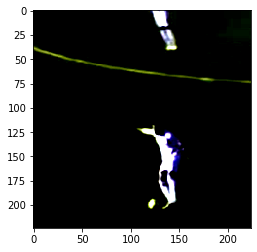

In [9]:
inputs.shape
plt.imshow(inputs[0,:,:,:].permute(1,2,0))


In [10]:
classes

tensor([0])

In [11]:
transform_trainbatch_size= 32
num_epochs = 3
total_step = math.ceil(len(data_loader) / data_loader.batch_sampler.batch_size)

In [12]:
len(data_loader)


2070

In [13]:
classifier = Classifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters())
#optimizer = optim.SGD(classifier.parameters(), lr=0.001, momentum=0.9)

Desiabled ther parameters


In [14]:
classifier.class_to_idx = data_loader.dataset.class_to_idx
classifier.idx_to_class = {
    idx: class_
    for class_, idx in classifier.class_to_idx.items()
}

list(classifier.idx_to_class.items())[:]

[(0, 'football'), (1, 'tennis'), (2, 'weight_lifting')]

In [ ]:

for epoch in range(num_epochs+1):  # loop over the dataset multiple times

    running_loss = 0.0
    correct =0
    accuracy = 0
    for i, data in enumerate(data_loader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimize
        outputs = classifier(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        
        ps = torch.exp(outputs)
        equality = (labels == ps.max(dim=1)[1])
        accuracy += equality.type(torch.FloatTensor).mean()
        if i % 100 == 99:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f acc : %.3f' %
                  (epoch + 1, i + 1, running_loss/100,accuracy ))
            running_loss = 0.0
            accuracy = 0
        # Save the weights.
    if epoch % 1 == 0:
        torch.save(classifier.state_dict(), os.path.join('./models', 'decoder-%d.pkl' % epoch))


In [15]:
weights = data_folder = os.path.join(basedir,'models/decoder-3.pkl')
classifier.load_state_dict(torch.load(weights))
classifier.eval()

Classifier(
  (pre_trained_model): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace)
      (16): MaxPool2d(kernel_siz

In [16]:
#summary(classifier,(3,224,224))

In [17]:
from collections import deque
import numpy as np
import argparse
import pickle
import cv2

In [28]:
# initialize the video stream, pointer to output video file, and
# frame dimensions
basedir= os.path.abspath(os.path.dirname('__file__'))
input_video = os.path.join(basedir,'example_clips/soccer.mp4')
#input_video =capture_video
output_video = os.path.join(basedir,'example_clips/lifting_out.mp4')
vs = cv2.VideoCapture(input_video
)
writer = None
(W, H) = (None, None)

In [29]:
mean = np.array([123.68, 116.779, 103.939][::1], dtype="float32")
Q = deque(maxlen=128)

In [26]:
from PIL import Image
from matplotlib import cm


In [ ]:
# loop over frames from the video file stream
while True:
    # read the next frame from the file
    (grabbed, frame) = vs.read()

    # if the frame was not grabbed, then we have reached the end
    # of the stream
    if not grabbed:
        break

    # if the frame dimensions are empty, grab them
    if W is None or H is None:
        (H, W) = frame.shape[:2]

    # clone the output frame, then convert it from BGR to RGB
    # ordering, resize the frame to a fixed 224x224, and then
    # perform mean subtraction
    
    output = frame.copy()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = Image.fromarray(frame)
    frame = transform_train(frame)
    frame = frame.view(1,3,224,224)
    # make predictions on the frame and then update the predictions
    # queue
    preds = classifier(frame)
    _, predicted = torch.max(preds, 1)


    # perform prediction averaging over the current history of
    # previous predictions
    #results = np.array(Q).mean(axis=0)
    #i = np.argmax(results)
    label = classifier.idx_to_class[predicted.item()]
    print(label)
    
    # draw the activity on the output frame
    text = "activity: {}".format(label)
    cv2.putText(output, text, (35, 50), cv2.FONT_HERSHEY_SIMPLEX,
        1.25, (0, 255, 0), 5)


        
# release the file pointers
print("[INFO] cleaning up...")

vs.release()

football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football
football


In [21]:
classifier.idx_to_class[0]

'football'

In [22]:
capture_video = os.path.join(basedir,'example_clips/my_vid.mp4')


In [23]:
    import cv2
    #Capture video from webcam
    vid_capture = cv2.VideoCapture(0)
    vid_cod = cv2.VideoWriter_fourcc(*'mp4v')
    output = cv2.VideoWriter(capture_video, vid_cod, 5.0, (640,480))
    while(True):
         # Capture each frame of webcam video
         ret,frame = vid_capture.read()
         cv2.imshow("My cam video", frame)
         output.write(frame)
         # Close and break the loop after pressing "x" key
         if cv2.waitKey(1) &0XFF == ord('x'):
             break
    # close the already opened camera
    vid_capture.release()
    # close the already opened file
    output.release()
    # close the window and de-allocate any associated memory usage
    cv2.destroyAllWindows()

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'
